## Imports

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

## Read data

In [69]:
S = pd.read_csv("Mass Spectrum_Assignment.csv",delimiter=',')
spectrum_trans = S.to_numpy()
spectrum = np.transpose(spectrum_trans)[0], np.transpose(spectrum_trans)[1]

In [70]:
spectrum = spectrum[0][spectrum[1] > -1 ], np.log10(spectrum[1][spectrum[1] > -1])

/home/sironton/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


## Plot of the mass spectrum

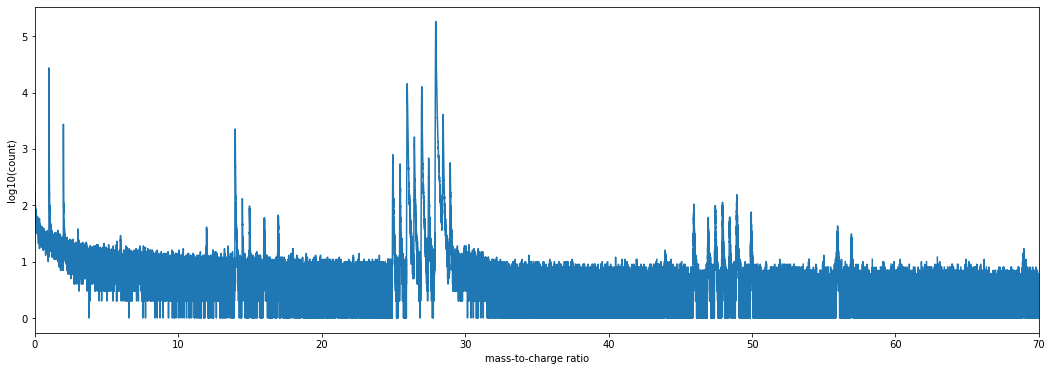

In [71]:
plt.figure(figsize=(18,6))
plt.plot(spectrum[0],spectrum[1])
plt.xlim(0,70)
plt.ylabel("log10(count)")
plt.xlabel("mass-to-charge ratio")
plt.show()

## Finding peaks

In [72]:
def find_peaks(ARRAY, threshold_point):
    peak_array = []
    for i in range(len(ARRAY)-1):
        if (ARRAY[i]>threshold_point) and (ARRAY[i+1] < ARRAY[i]) and (ARRAY[i-1] < ARRAY[i]) :
            peak_array.append([i/1000, ARRAY[i]])
    return np.transpose(peak_array)

## Partition data set 

In [73]:
SPECTRUM_PEAKS = []

### 0 to 10

In [74]:
minlim = 0
maxlim = 10000
peak_threshold = 3
data = spectrum[0][minlim:maxlim], spectrum[1][minlim:maxlim]
peaks = find_peaks(data[1], peak_threshold)
peaks[0] += minlim/1000
for peak in np.transpose(peaks):
    SPECTRUM_PEAKS.append(peak)

### 10 to 20

In [75]:
minlim = 10000
maxlim = 20000
peak_threshold = 1.5
data = spectrum[0][minlim:maxlim], spectrum[1][minlim:maxlim]
peaks = find_peaks(data[1], peak_threshold)
peaks[0] += minlim/1000
for peak in np.transpose(peaks) :
    SPECTRUM_PEAKS.append(peak)

### 24 to 32

In [76]:
minlim = 24000
maxlim = 32000
peak_threshold = 2.5
data = spectrum[0][minlim:maxlim], spectrum[1][minlim:maxlim]
peaks = find_peaks(data[1], peak_threshold)
peaks[0] += minlim/1000
for peak in np.transpose(peaks) :
    SPECTRUM_PEAKS.append(peak)

### 45 to 52

In [77]:
minlim = 45000
maxlim = 52000
peak_threshold = 1.5
data = spectrum[0][minlim:maxlim], spectrum[1][minlim:maxlim]
peaks = find_peaks(data[1], peak_threshold)
peaks[0] += minlim/1000
for peak in np.transpose(peaks) :
    SPECTRUM_PEAKS.append(peak)

### 55 to 60

In [78]:
minlim = 55000
maxlim = 60000
peak_threshold = 1.3
data = spectrum[0][minlim:maxlim], spectrum[1][minlim:maxlim]
peaks = find_peaks(data[1], peak_threshold)
peaks[0] += minlim/1000
for peak in np.transpose(peaks) :
    SPECTRUM_PEAKS.append(peak)

## Identified Peaks

The identified peaks in the mass to charge ratios in the spectrum are : 

In [79]:
SPECTRUM_PEAKS = np.transpose(SPECTRUM_PEAKS)
SPECTRUM_PEAKS = 2.0*SPECTRUM_PEAKS
SPECTRUM_PEAKS[0] = np.round(SPECTRUM_PEAKS[0])
SPECTRUM_PEAKS = SPECTRUM_PEAKS/2.0

In [80]:
UNIQUE_PEAKS = []
for i in range(len(SPECTRUM_PEAKS[0])):
    point  = SPECTRUM_PEAKS[0][i]
    peak = np.max(SPECTRUM_PEAKS[1][SPECTRUM_PEAKS[0] == point])
    UNIQUE_PEAKS.append([point,peak])    

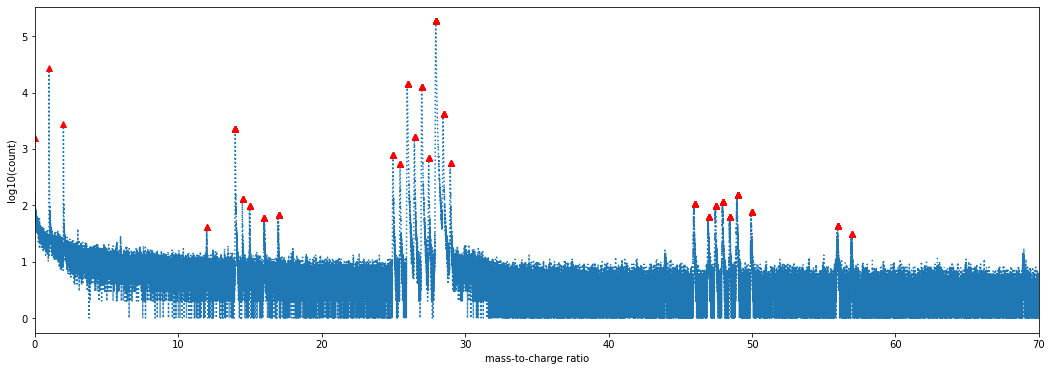

In [81]:
plt.figure(figsize=(18,6))
plt.plot(spectrum[0],spectrum[1],':')
UNIQUE_PEAKS = np.transpose(UNIQUE_PEAKS)
plt.plot(UNIQUE_PEAKS[0], UNIQUE_PEAKS[1], 'r^')
plt.xlim(0,70)
plt.ylabel("log10(count)")
plt.xlabel("mass-to-charge ratio")
plt.show()

## Element detection

In [90]:
count_list = []
for mbyn in np.unique(UNIQUE_PEAKS[0]) : 
    count_list.append(10**np.max(UNIQUE_PEAKS[1][UNIQUE_PEAKS[0] == mbyn]))
    
d = {'mass-to-charge-ratio': np.unique(UNIQUE_PEAKS[0]), 'log10(count)' :count_list}

peak_df = pd.DataFrame(data = d)
peak_df['Element'] = ""
peak_df

,mass-to-charge-ratio,log10(count),Element
0,0.0,1566.0,
1,1.0,27381.0,
2,2.0,2737.0,
3,12.0,41.0,
4,14.0,2256.0,
5,14.5,131.0,
6,15.0,97.0,
7,16.0,60.0,
8,17.0,67.0,
9,25.0,785.0,


The most prominent peaks are at :

1, 2, 14, 26, 26.5, 27, 28, 28.5, 29, 48 and 49

The peak at 14 can be either $N^+$ or $Si^{2+}$

### Si

The peak at 14 can be $N^+$ or $Si^{2+}$. But the existence of other peaks suggest it is Si. 

The abundancies of Si are :

|Isotope|%Abundancies| mass-to-charge of 2+ state |Count in spectrum| |
|--|--|--|--| --|
|28|92| 14|2256|
|29|5|14.5|131|
|30|3|15|97|

The ratio 92/5(18.4) is approximately same as 2256/131(17.22) and hence **Si** is in the given sample

### Cr


The peak at 26 can be $Cr^{2+}$. 

The abundancies of Cr are :

|Isotope|%Abundancies| mass-to-charge of 2+ state |Count in spectrum| |
|--|--|--|--| --|
|50|4| 25| 539 |
|52|83|26|14318 |
|53|9|26.5| 1628 |
|54|2|27| 12722 | 

The ratio 4/83 is aproximately same as 539/14318 and so there is **Cr** in the given sample.

### Fe

The peak at 28 can be $Fe^{2+}$. 

The abundancies of Cr are :

|Isotope|%Abundancies| mass-to-charge of 2+ state |Count in spectrum| |
|--|--|--|--| --|
|54|5.8| 26|14318|
|56|91.7|28|182538|
|57|2.1|28.5|4083|
|58|0.2|29| 567.0| 

The ratio 91.7/2.1(43.66) is approximately same as 182538/4083(44.7) and hence **Fe** is in the given sample

### Ti / Mo

The peak at 48 can be $Ti^{+}$. 

The abundancies of Ti are :

|Isotope|%Abundancies|Count in spectrum| |
|--|--|--|--| --|
|46|8|108|
|47|7|61|
|48|73|113|
|49|5|154| 
|50|5|76| 

Its not entirely $Ti$ there can be presence of $Mo$

As the abundancies of $Mo$ are : 

|Isotope|%Abundancies| mass-to-charge of 2+ state |Count in spectrum| |
|--|--|--|--| --|
|92|14| 46|108|
|95|15|47.5|99|
|96|18|48|113|
|98|24|49|154| 

Looking at the count data it is more likely that the element here is $Mo$


### Cd

The peaks at 56 and 57 can be due to $Fe$ or can be due to $Cd^{2+}$. 

The abundant isotopes of Cd are :

|Isotope|%Abundancies| mass-to-charge of 2+ state |Count in spectrum| |
|--|--|--|--| --|
|112|24| 56|43|
|114|28| 57|31|

It is unlikely as the count ratio does not match with the isotopic adbundancies ratio. But no other element shows such peaks to maybe it is $Cd$

## Final plot

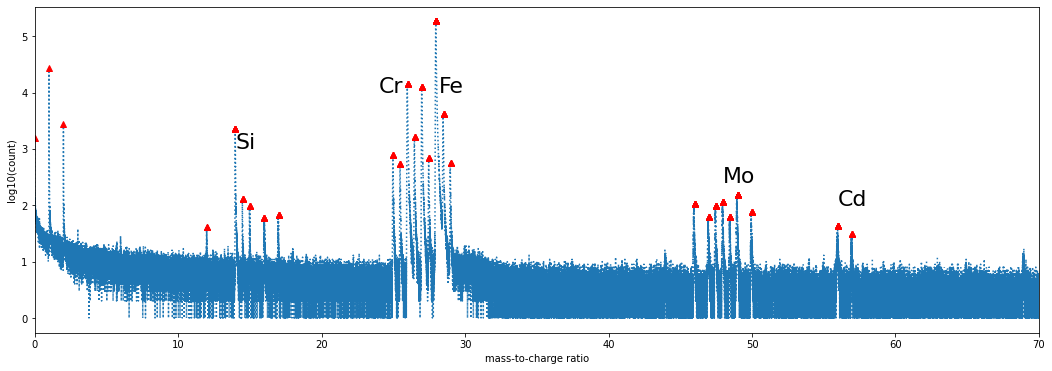

In [115]:
plt.figure(figsize=(18,6))
plt.plot(spectrum[0],spectrum[1],':')
UNIQUE_PEAKS = np.transpose(UNIQUE_PEAKS)
plt.plot(UNIQUE_PEAKS[0], UNIQUE_PEAKS[1], 'r^')
plt.xlim(0,70)
plt.ylabel("log10(count)")
plt.xlabel("mass-to-charge ratio")

plt.text(14,3,"Si",fontsize = 22)
plt.text(28.2,4,"Fe",fontsize = 22)
plt.text(24,4,"Cr",fontsize = 22)
plt.text(56,2,"Cd",fontsize = 22)
plt.text(48,2.4,"Mo",fontsize = 22)
plt.show()